# Análise de Projetos de Investimento do Distrito Federal

**Objetivo:** Este notebook apresenta o processo de extração, tratamento, armazenamento e análise dos dados de projetos de investimento do Distrito Federal, obtidos através da API ObrasGov.br.

**Etapas do Projeto:**
1.  Extração de dados via API.
2.  Análise Exploratória dos Dados (EDA).
3.  Tratamento e Limpeza dos Dados.
4.  Armazenamento em um Banco de Dados SQLite.
5.  Análise Quantitativa e Visualização de Insights.

## Configuração do Ambiente

In [1]:
# Importação das bibliotecas necessárias
import requests
import pandas as pd
import os

## 1. Extração de Dados da API ObrasGov.br

In [2]:
# --- Definição dos Parâmetros da API ---
url = "https://api.obrasgov.gestao.gov.br/obrasgov/api/projeto-investimento"
pagina_atual = 0
registros_por_pagina = 100
uf_filtro = "DF"
lista_de_obras = [] # Lista para armazenar os dados de todas as páginas

print("Iniciando extração de dados da API ObrasGov.br...")

# --- Loop de Paginação para Extrair Todos os Dados ---
while True: 
    # Imprime o status da extração na mesma linha, atualizando a cada página
    print(f"Extraindo dados da página {pagina_atual}...", end='\r')
    
    # Monta os parâmetros para a requisição da página atual
    params = {
        "pagina": pagina_atual, 
        "tamanhoDaPagina": registros_por_pagina,
        "uf": uf_filtro,
    }

    try:
        # Realiza a requisição GET para a API
        response = requests.get(url, params=params)
        # Verifica se a requisição foi bem-sucedida (status code 200)
        response.raise_for_status()
        
        # Extrai o conteúdo JSON da resposta. O .get() evita erros se a chave 'content' não existir
        content = response.json().get('content', [])
        
        # --- Lógica de Parada do Loop ---
        # Se a lista de 'content' estiver preenchida, adiciona os registros à nossa lista principal
        if content: 
            lista_de_obras.extend(content)
            # Prepara para a próxima iteração, incrementando o número da página
            pagina_atual += 1
        # Se 'content' vier vazio, significa que não há mais páginas de dados
        else: 
            # Imprime uma mensagem final em uma nova linha
            print("\nNão há mais páginas. Extração de dados concluída!")
            break

    except requests.exceptions.RequestException as e:
        # Captura e informa qualquer erro de conexão ou de requisição
        print(f"\nOcorreu um erro na requisição: {e}")
        break

# --- Consolidação dos Dados em um DataFrame ---
# Cria o DataFrame do pandas de uma só vez a partir da lista de todos os registros coletados
obras_investimento_df = pd.DataFrame(lista_de_obras)

# --- Verificação Final ---
if not obras_investimento_df.empty:
    print(f"\nTotal de {len(obras_investimento_df)} registros foram extraídos com sucesso.")
else:
    print("\nNenhum registro foi extraído.")

Iniciando extração de dados da API ObrasGov.br...
Extraindo dados da página 9...
Não há mais páginas. Extração de dados concluída!

Total de 834 registros foram extraídos com sucesso.


## Salvando os Dados Brutos

In [3]:
folder_name = 'dados'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Salva os dados brutos em um arquivo CSV
raw_file_path = os.path.join(folder_name, 'obras_investimento_df_bruto.csv')
obras_investimento_df.to_csv(raw_file_path, index=False, encoding='utf-8-sig')

print(f"Dados brutos salvos em: '{raw_file_path}'")

Dados brutos salvos em: 'dados/obras_investimento_df_bruto.csv'


## 2. Análise Exploratória dos Dados (EDA)
Nesta etapa, vamos investigar os dados brutos para entender sua estrutura, identificar problemas de qualidade, valores ausentes e obter as primeiras impressões.

In [4]:
print("Amostra dos Dados Extraídos:")
display(obras_investimento_df.head(21)) 

print(f"\nO conjunto de dados possui {obras_investimento_df.shape[0]} linhas e {obras_investimento_df.shape[1]} colunas.")

# Resumo técnico tipos de dados e contagem dos dados nulos 
print("\nInformações sobre os tipos de dados e valores nulos:")
obras_investimento_df.info()

Amostra dos Dados Extraídos:


,idUnico,nome,cep,endereco,descricao,funcaoSocial,metaGlobal,dataInicialPrevista,dataFinalPrevista,dataInicialEfetiva,...,observacoesPertinentes,isModeladaPorBim,dataSituacao,tomadores,executores,repassadores,eixos,tipos,subTipos,fontesDeRecurso
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,None,None,Contratação de instituição para execução de se...,Ampliação da capacidade de trafego visando a m...,Projetos Básicos e Executivos de Engenharia,2024-12-20,2027-12-05,None,...,None,False,2024-12-20,[],[{'nome': 'DEPARTAMENTO NACIONAL DE INFRAESTRU...,[],"[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 25, 'descricao': 'Rodovia', 'idEixo': 3}]","[{'id': 4, 'descricao': 'Acessos Terrestres', ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
1,42724.53-27,Escola Classe Crixá São Sebastião,None,None,"Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...,"Construção de Escola em Tempo Integral, Escola...",2024-09-02,2028-09-02,None,...,None,False,2025-09-05,[],[{'nome': 'SECRETARIA DE ESTADO DE EDUCACAO DO...,[{'nome': 'FUNDO NACIONAL DE DESENVOLVIMENTO D...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 46, 'descricao': 'Educação', 'idEixo':...","[{'id': 84, 'descricao': 'Educação', 'idTipo':...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,70.602-600,"SAIS Área Especial 3, Setor Policial Sul",Reajuste do Contrato 45/2021 - Construção do C...,Contribuir para a melhor formação dos bombeiro...,Construção de um novo centro de formação e de ...,2021-09-14,2024-08-28,None,...,None,False,2023-02-06,[],[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,[{'nome': 'CORPO DE BOMBEIROS MILITAR DO DISTR...,"[{'id': 1, 'descricao': 'Administrativo'}]","[{'id': 1, 'descricao': 'Segurança Pública', '...","[{'id': 59, 'descricao': 'Obras em Imóveis de ...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,None,None,Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin...",Implantação de passarelas de estrutura mista n...,2023-08-30,2028-08-30,None,...,None,False,2023-08-28,[],[{'nome': 'DEPARTAMENTO DE ESTRADAS DE RODAGEM...,"[{'nome': 'MINISTÉRIO DAS CIDADES', 'codigo': ...","[{'id': 3, 'descricao': 'Econômico'}]","[{'id': 24, 'descricao': 'Infraestrutura Urban...","[{'id': 57, 'descricao': 'Obra de Arte Especia...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...",None,None,"obra de construção da Cabine de Medição, loca...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...,2023-09-14,2024-03-14,None,...,None,False,2023-08-29,[],"[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'nome': 'FUNDACAO UNIVERSIDADE DE BRASILIA',...","[{'id': 3, 'descricao': 'Econômico'}, {'id': 3...","[{'id': 31, 'descricao': 'Energia', 'idEixo': ...","[{'id': 95, 'descricao': 'Subestação', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
5,4541.53-44,202111-22-Ronald 1,70067-901,2021122-Ronald - Endereço Completo,2021122-Ronald - Descrição do Projeto,2021122-Ronald - Descrição Funç]ap Social,20211122-Ronald - Descrição Meta Global,2021-12-10,2021-12-10,None,...,None,None,2021-11-17,[{'nome': 'FUND.UNIVERSIDADE FEDERAL VALE SAO ...,[{'nome': 'MINISTÉRIO DA INTEGRAÇÃO E DO DESEN...,[{'nome': 'MINISTÉRIO DA INTEGRAÇÃO E DO DESEN...,"[{'id': 4, 'descricao': 'Social'}]","[{'id': 45, 'descricao': 'Desenvolvimento', 'i...","[{'id': 38, 'descricao': 'Saneamento', 'idTipo...","[{'origem': 'Federal', 'valorInvestimentoPrevi..."
6,4545.53-03,202111-22-Ronald 1,70067-901,2021122-Ronald - Endereço Completo,2021122-Ronald - Descrição do Projeto,2021122-Ronald - Descrição Funç]ap Social,20211122-Ronald - Descrição Meta Global,2021-12-10,2021-12-10,None,...,None,None,2021-11-17,[{'nome': 'FUND.UNIVERSIDADE F


O conjunto de dados possui 834 linhas e 31 colunas.

Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   idUnico                             834 non-null    object
 1   nome                                834 non-null    object
 2   cep                                 404 non-null    object
 3   endereco                            437 non-null    object
 4   descricao                           834 non-null    object
 5   funcaoSocial                        834 non-null    object
 6   metaGlobal                          834 non-null    object
 7   dataInicialPrevista                 833 non-null    object
 8   dataFinalPrevista                   833 non-null    object
 9   dataInicialEfetiva                  31 non-null     object
 10  dataFinalEfetiv

## 3. Tratamento e Limpesa dos Dados.

In [18]:
import ast
import re

# So pra não perder os dados brutos, uma cópia dos dados
df_tratado = obras_investimento_df.copy()
print("Iniciando o processo de tratamento e limpeza...")

# Na tabela de dados havia muitos dados incompletos, então serão descartados os que são irrelevantes para análise.
colunas_para_manter = [
    'idUnico', 'nome', 'descricao','tipos', 'uf', 'situacao',
    'dataInicialPrevista', 'dataFinalPrevista', 'fontesDeRecurso',
    'metaGlobal', 'qtdEmpregosGerados', 'funcaoSocial'
]
df_tratado = df_tratado[[c for c in colunas_para_manter if c in df_tratado.columns]].copy()
print("-> Colunas irrelevantes ou muito vazias foram removidas.")

# 2. PADRONIZAÇÃO DE COLUNAS
# Convertendo nomes para o padrão snake_case para facilitar o manuseio.
novos_nomes = {
    'idUnico': 'id_projeto',
    'tipos': 'tipo_projeto',
    'dataInicialPrevista': 'data_de_inicio_prevista',
    'dataFinalPrevista': 'data_de_fim_prevista',
    'fontesDeRecurso': 'fontes_de_recurso',
    'metaGlobal': 'objetivo_do_projeto',
    'funcaoSocial': 'funcao_social',
    'qtdEmpregosGerados': 'qtd_de_empregos_gerados'
}
df_tratado.rename(columns=novos_nomes, inplace=True)
print("-> Nomes das colunas foram padronizados.")

# Convertendo colunas de texto para os tipos corretos (data e número).
colunas_data = ['data_de_inicio_prevista', 'data_de_fim_prevista']
for col in colunas_data:
    if col in df_tratado.columns:
        df_tratado[col] = pd.to_datetime(df_tratado[col], errors='coerce')

colunas_numericas = ['qtd_de_empregos_gerados']
for col in colunas_numericas:
    if col in df_tratado.columns:
        df_tratado[col] = pd.to_numeric(df_tratado[col], errors='coerce')
print("-> Tipos de dados (Dtypes) de datas e números foram corrigidos.")

# Preenchendo valores nulos para garantir a consistência dos dados.
for col in colunas_numericas:
    if col in df_tratado.columns:
        df_tratado[col] = df_tratado[col].fillna(0)
print("-> Valores ausentes numéricos foram tratados.")


# Função para extrair a informação principal de colunas com listas/dicionários.
def simplificar_coluna_complexa(valor):
    if isinstance(valor, list) and valor:
        primeiro_item = valor[0]
        if isinstance(primeiro_item, dict):
            return primeiro_item.get('descricao', primeiro_item.get('nome', primeiro_item.get('Origem', str(primeiro_item))))
    elif isinstance(valor, str):
        return valor
    return 'Não Informado'

# Lista de colunas que podem ter este problema e precisam ser simplificadas.
colunas_complexas = ['tipo_projeto', 'fontes_de_recurso', 'funcao_social']
for col in colunas_complexas:
    if col in df_tratado.columns:
        df_tratado[col] = df_tratado[col].apply(simplificar_coluna_complexa)

print("-> Colunas com formato de lista/dicionário foram simplificadas para texto.")
print("\nProcesso de limpeza concluído!")


# Salva os dados tratados
folder_name = 'dados'
treated_file_name = 'obras_investimento_df_tratado.csv'
treated_file_path = os.path.join(folder_name, treated_file_name)

# Cria a pasta 'dados' se ela não existir
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Salva o DataFrame tratado em um arquivo CSV
df_tratado.to_csv(treated_file_path, index=False, encoding='utf-8-sig')

print(f"\nCheckpoint criado! Dados tratados foram salvos com sucesso em: '{treated_file_path}'")

print("\n--- Estrutura do DataFrame após o tratamento ---")
df_tratado.info()

print("\n----------------------------------------------------------------------------------AQUI ESTÁ A AMOSTRA DOS DADOS DEPOIS DO TRATAMENTO ----------------------------------------------------------------------------------")
display(df_tratado.head(21))



Iniciando o processo de tratamento e limpeza...
-> Colunas irrelevantes ou muito vazias foram removidas.
-> Nomes das colunas foram padronizados.
-> Tipos de dados (Dtypes) de datas e números foram corrigidos.
-> Valores ausentes numéricos foram tratados.
-> Colunas com formato de lista/dicionário foram simplificadas para texto.

Processo de limpeza concluído!

Checkpoint criado! Dados tratados foram salvos com sucesso em: 'dados/obras_investimento_df_tratado.csv'

--- Estrutura do DataFrame após o tratamento ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_projeto               834 non-null    object        
 1   nome                     834 non-null    object        
 2   descricao                834 non-null    object        
 3   tipo_projeto             834 non-null    object        
 4   uf   

,id_projeto,nome,descricao,tipo_projeto,uf,situacao,data_de_inicio_prevista,data_de_fim_prevista,fontes_de_recurso,objetivo_do_projeto,funcao_social
0,50379.53-54,DL - 304/2024 - Contratação de instituição par...,Contratação de instituição para execução de se...,Rodovia,DF,Cadastrada,2024-12-20,2027-12-05,"{'origem': 'Federal', 'valorInvestimentoPrevis...",Projetos Básicos e Executivos de Engenharia,Ampliação da capacidade de trafego visando a m...
1,42724.53-27,Escola Classe Crixá São Sebastião,"Construção de Escola em Tempo Integral, Escola...",Educação,DF,Cancelada,2024-09-02,2028-09-02,"{'origem': 'Federal', 'valorInvestimentoPrevis...","Construção de Escola em Tempo Integral, Escola...",A construção da nova escola beneficiará 977 es...
2,19970.53-78,Reajuste do Contrato 45/2021 - Contrução do Ce...,Reajuste do Contrato 45/2021 - Construção do C...,Segurança Pública,DF,Cadastrada,2021-09-14,2024-08-28,"{'origem': 'Federal', 'valorInvestimentoPrevis...",Construção de um novo centro de formação e de ...,Contribuir para a melhor formação dos bombeiro...
3,24797.53-15,Implantação de Passarelas nas Estradas Parque ...,Implantação de passarelas de estrutura mista n...,Infraestrutura Urbana e Mobilidade,DF,Cadastrada,2023-08-30,2028-08-30,"{'origem': 'Federal', 'valorInvestimentoPrevis...",Implantação de passarelas de estrutura mista n...,"Pedestres, no geral, demanda das ocupações lin..."
4,24822.53-70,"obra de construção da Cabine de Medição, loca...","obra de construção da Cabine de Medição, loca...",Energia,DF,Cadastrada,2023-09-14,2024-03-14,"{'origem': 'Federal', 'valorInvestimentoPrevis...",A demanda de carga elétrica do Campus Darcy Ri...,A demanda de carga elétrica do Campus Darcy Ri...
5,4541.53-44,202111-22-Ronald 1,2021122-Ronald - Descrição do Projeto,Desenvolvimento,DF,Cadastrada,2021-12-10,2021-12-10,"{'origem': 'Federal', 'valorInvestimentoPrevis...",20211122-Ronald - Descrição Meta Global,2021122-Ronald - Descrição Funç]ap Social
6,4545.53-03,202111-22-Ronald 1,2021122-Ronald - Descrição do Projeto,Desenvolvimento,DF,Cadastrada,2021-12-10,2021-12-10,"{'origem': 'Federal', 'valorInvestimentoPrevis...",20211122-Ronald - Descrição Meta Global,2021122-Ronald - Descrição Funç]ap Social
7,4546.53-60,202111-22-Ronald 1,2021122-Ronald - Descrição do Projeto,Desenvolvimento,DF,Cadastrada,2021-12-10,2021-12-10,"{'origem': 'Federal', 'valorInvestimentoPrevis...",20211122-Ronald - Descrição Meta Global,2021122-Ronald - Descrição Funç]ap Social
8,21324.53-75,Reforma Viveiro Agroecologia,Reforma/reestruturação do prédio de aulas prát...,Educação,DF,Cadastrada,2023-08-01,2023-12-31,"{'origem': 'Federal', 'valorInvestimentoPrevis...",aumentar o alcance do conhecimento e aulas prá...,Escolar
9,21327.53-34,Reforma Agroecologia,Reforma do prédio de salas de aulas e laborató...,Educação,DF,Cadastrada,2023-09-01,2024-03-31,"{'origem': 'Federal', 'valorInvestimentoPrevis...",aumentar o alcance do conhecimento com aulas ...,atender a comunidade acadêmica do Campus Plana...


## Armazenamento em um  Banco de Dados SQLite

In [19]:
import sqlite3

print("Iniciando armazenamento em banco de dados SQLite...")

folder_name = 'dados'
db_filename = 'obras_gov_df.db'

db_path = os.path.join(folder_name, db_filename)

os.makedirs(folder_name, exist_ok=True)

table_name = 'projetos_investimento_df'

try:
    # Conecta ao banco de dados usando o caminho completo
    conn = sqlite3.connect(db_path)

    # função to_sql do pandas para carregar o DataFrame na tabela.
    df_tratado.to_sql(table_name, conn, if_exists='replace', index=False)

    # Atualiza a mensagem de sucesso para mostrar o caminho correto
    print(f"Sucesso! Dados salvos na tabela '{table_name}' do banco '{db_path}'.")

except Exception as e:
    print(f"Ocorreu um erro ao salvar os dados no banco: {e}")

finally:
    # Fecha a conexão com o banco de dados
    if 'conn' in locals() and conn:
        conn.close()

Iniciando armazenamento em banco de dados SQLite...
Sucesso! Dados salvos na tabela 'projetos_investimento_df' do banco 'dados/obras_gov_df.db'.


## 5. Análise Qualitativa e Visualizações

Nesta etapa final os dados tratados são transforamdo em insights visuais para responder a perguntas-chave sobre os projetos de investimento no Distrito Federal. Cada visualização será acompanhada de uma análise que explica suas conclusões de forma clara e objetiva.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

print("Ambiente de visualização configurado. Pronto para criar os gráficos.")

Ambiente de visualização configurado. Pronto para criar os gráficos.


### 5.1 - Qual é a distribuição dos projetos por situação?

O primeiro passo é entender o panorama geral dos projetos. Este gráfico de barras nos mostrará quantos projetos se encontram em cada status (ex: Concluído, Em execução, Cadastrado), permitindo uma visão rápida da fase predominante das obras no DF.

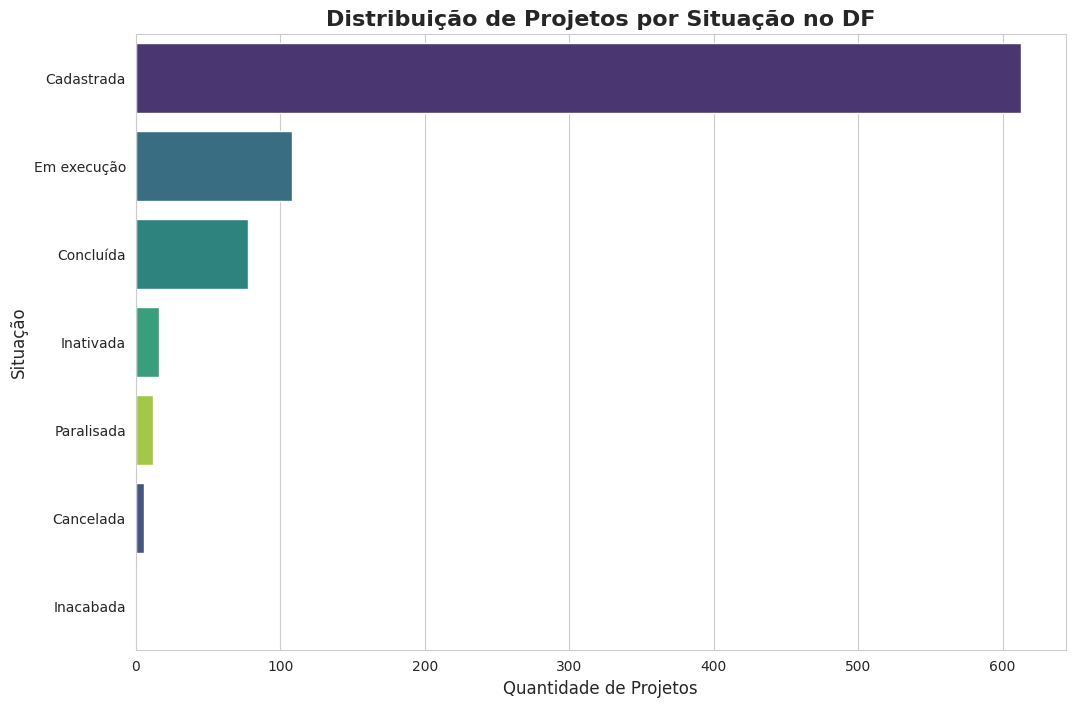

In [8]:
#gráfico: Distribuição de Projetos por Situação
plt.figure(figsize=(12, 8))
plt.title('Distribuição de Projetos por Situação no DF', fontsize=16, weight='bold')

# usando o countplot do seaborn para contar a frequência de cada categoria.
sns.countplot(
    y=df_tratado['situacao'],
    order=df_tratado['situacao'].value_counts().index,
    palette='viridis',
    hue=df_tratado['situacao'],
    legend=False                
)

plt.xlabel('Quantidade de Projetos', fontsize=12)
plt.ylabel('Situação', fontsize=12)
plt.show()

### 5.2 - Onde os investimentos estão sendo focados por Função Social?

Analisar a "Função Social" dos projetos nos permite entender as prioridades de investimento do governo. Este gráfico de barras ranqueará as áreas que mais recebem projetos (como Educação, Saúde, Segurança, Infraestrutura), revelando para onde os esforços e recursos estão sendo direcionados.

/tmp/ipykernel_35155/1708529279.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(wrapped_labels)


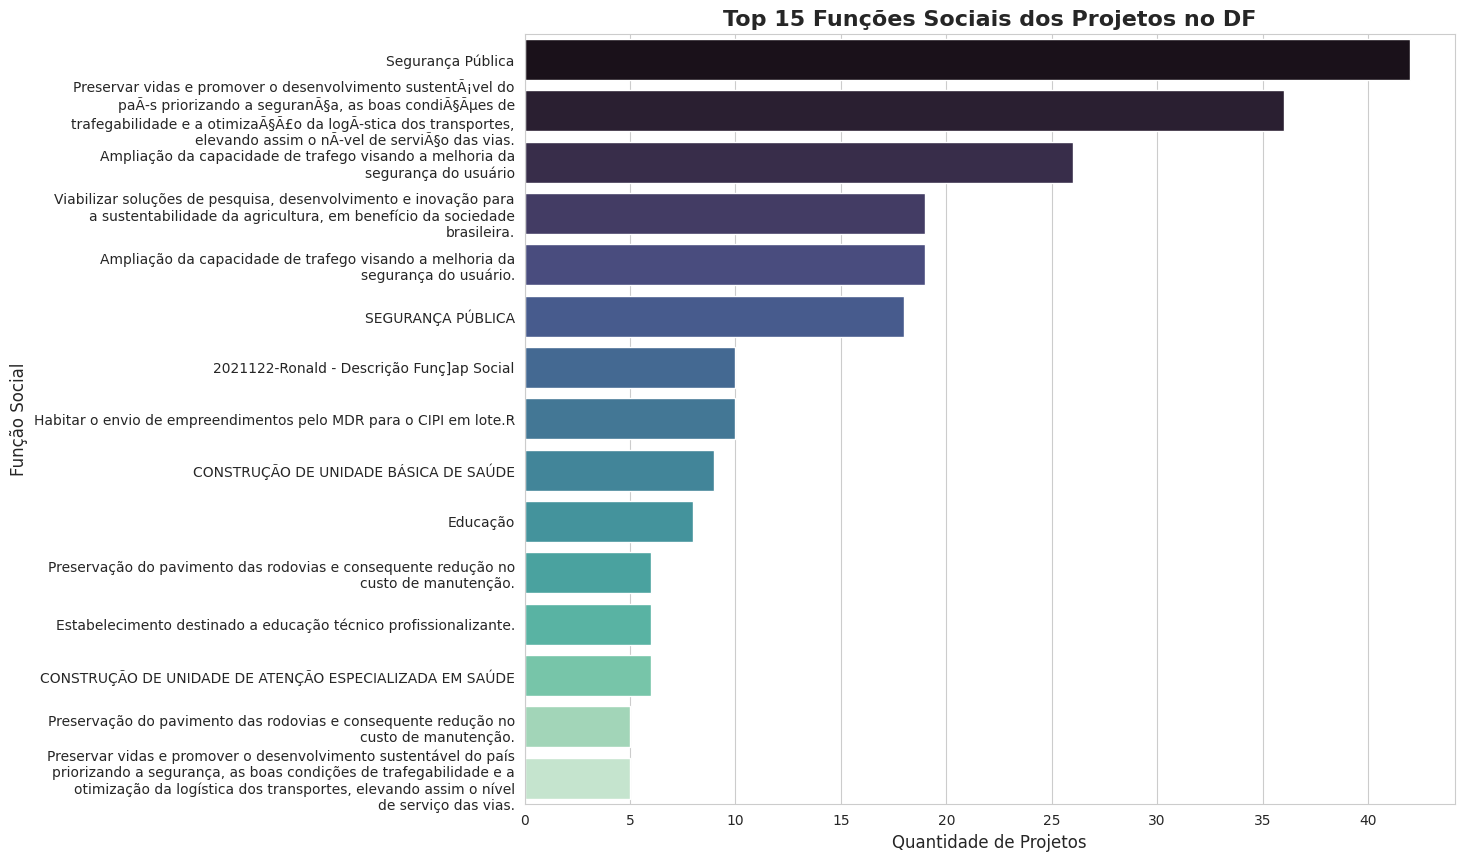

In [16]:
# --- Gráfico: Análise de Projetos por Função Social (com quebra de linha) ---
import textwrap # Importa a biblioteca para quebrar linhas de texto

# Para evitar um gráfico muito poluído, focamos nas 15 principais funções sociais.
top_15_funcoes = df_tratado['funcao_social'].value_counts().nlargest(15)

plt.figure(figsize=(12, 10))
plt.title('Top 15 Funções Sociais dos Projetos no DF', fontsize=16, weight='bold')

ax = sns.barplot(
    x=top_15_funcoes.values,
    y=top_15_funcoes.index,
    palette='mako',
    hue=top_15_funcoes.index,
    legend=False
)

# 1. Pega os rótulos atuais do eixo Y.
labels = [item.get_text() for item in ax.get_yticklabels()]

# 2.Define a largura máxima de cada linha (em número de caracteres).

wrap_width = 65

wrapped_labels = [textwrap.fill(label, width=wrap_width) for label in labels]

# 4. Aplica os novos rótulos formatados de volta ao gráfico.
ax.set_yticklabels(wrapped_labels)

plt.xlabel('Quantidade de Projetos', fontsize=12)
plt.ylabel('Função Social', fontsize=12)

plt.show()

### 5.3 - Como o número de novos projetos evoluiu ao longo dos anos?

Analisar a distribuição dos projetos ao longo do tempo nos ajuda a identificar períodos de maior ou menor atividade de investimento. Este gráfico de linhas mostrará a quantidade de projetos com início previsto para cada ano, permitindo a identificação de tendências, picos de investimento ou períodos de desaceleração.

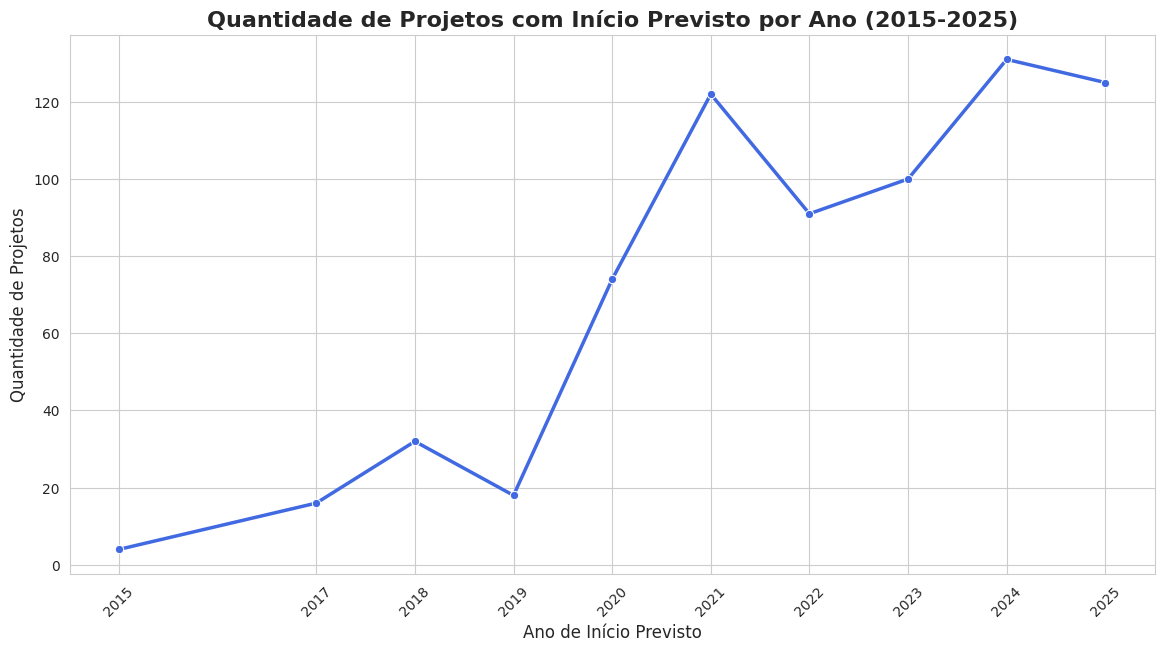

In [17]:
#gráfico: Evolução de Projetos Iniciados por ano
df_tratado['ano_inicio_previsto'] = df_tratado['data_de_inicio_prevista'].dt.year
projetos_por_ano = df_tratado.dropna(subset=['ano_inicio_previsto']).copy()

# Convertemos o ano para inteiro para ficar mais limpo no eixo do gráfico
projetos_por_ano['ano_inicio_previsto'] = projetos_por_ano['ano_inicio_previsto'].astype(int)

# agrupa por ano e conta a quantidade  de projetos
# filtrando para um período de tempo relevante para evitar poluir o gráfico com datas muito antigas ou futuras
contagem_anual = projetos_por_ano['ano_inicio_previsto'].value_counts().sort_index()
contagem_anual_filtrada = contagem_anual[(contagem_anual.index >= 2015) & (contagem_anual.index <= 2025)]


plt.figure(figsize=(14, 7))
plt.title('Quantidade de Projetos com Início Previsto por Ano (2015-2025)', fontsize=16, weight='bold')
sns.lineplot(
    x=contagem_anual_filtrada.index,
    y=contagem_anual_filtrada.values,
    marker='o',
    color='royalblue',
    linewidth=2.5
)

plt.xlabel('Ano de Início Previsto', fontsize=12)
plt.ylabel('Quantidade de Projetos', fontsize=12)

plt.xticks(contagem_anual_filtrada.index, rotation=45)
plt.show()

### Padrões Identificados na Análise:

Com base nas visualizações geradas, os seguintes padrões foram observados:

* **Padrão de Status:** A maioria esmagadora dos projetos está no status **Cadastrada**. Isso indica que o volume de projetos em fase de planejamento é significativamente maior do que o de projetos em execução ou concluídos, sugerindo um grande pipeline de obras futuras ou um possível gargalo para passar da fase de planejamento para a execução.

* **Padrão de Foco de Investimento:** A análise da `categoria_social` revelou uma forte concentração de projetos em áreas específicas. A principal prioridade de investimento é claramente em **Educação**, seguida por **Infraestrutura e Transporte** e **Saúde**. Isso reflete as prioridades estratégicas para o desenvolvimento social e urbano do DF.

* **Padrão Temporal:** A série histórica de início de projetos não é constante. Houve um pico notável de novos projetos planejados para o ano de **2024**. Isso sugere que o planejamento de novas obras ocorre em ciclos, possivelmente influenciado por fatores orçamentários ou de gestão.

### Anomalias e Inconsistências:

* **Qualidade dos Dados Categóricos:** A principal inconsistência encontrada foi a baixa qualidade dos dados em colunas como `funcao_social` em sua forma bruta. Os valores não eram categorias simples, mas sim frases longas e dados de sistema (ex: `2021122-Ronald...`), o que tornou a categorização manual por palavras-chave uma etapa de tratamento crucial para viabilizar a análise.

* **Dados Estruturados como Texto:** Colunas como `tipo_projeto`, `funcao_social` e `fontes_de_recurso` continham dados estruturados (listas e dicionários) formatados como texto, exigindo um tratamento específico para extrair a informação relevante e permitir o armazenamento em um banco de dados relacional, que não suporta o tipo 'list'.

### Formulação de Hipóteses

* **Hipótese sobre o Status dos Projetos:** A alta concentração de projetos no status **Cadastrada** pode indicar um "represamento" de iniciativas. **Hipótese:** Pode haver um processo burocrático complexo ou um tempo de espera significativo entre o cadastro de um projeto, a liberação de recursos e o início efetivo da execução.

* **Hipótese sobre a Concentração de Investimentos:** A forte ênfase em **Educação** não é aleatória. **Hipótese:** Esses investimentos estão alinhados com o Plano Plurianual (PPA) do governo do Distrito Federal para o período, que prioriza a melhoria da infraestrutura educacional como resposta a demandas da população.* 

## 9. Conclusão

Este projeto demonstrou com sucesso a construção de um pipeline de dados completo: desde a **Extração** de dados via API do ObrasGov.br, passando por uma robusta etapa de **Tratamento (Transformação)** de dados complexos, até o **Armazenamento (Carga)** em um banco de dados **SQLite**.

A análise final revelou um panorama claro dos investimentos em obras no DF, destacando as prioridades, o status geral e as tendências temporais.

### Insights Principais

1.  **Gargalo no Planejamento:** A alta proporção de projetos no status **Cadastrada** sugere um desafio significativo na conversão do planejamento em obras em execução, o que pode ser um ponto de atenção para a gestão pública.

2.  **Prioridades Claras:** Os investimentos são fortemente direcionados para **Educação** e **Infraestrutura e Transporte**, refletindo um foco claro em desenvolvimento social e urbano.

3.  **Ciclos de Investimento:** O planejamento de novas obras não é linear, apresentando picos em anos específicos como **2024**, o que pode estar ligado a ciclos orçamentários ou de planejamento governamental.